In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import hgc_testbeam as hgc
import math

In [2]:
hgc.runlist

,Run,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration
136,384,2018-10-13 10:20:00,11958,electron,250,22b,1
137,385,2018-10-13 10:31:00,10161,electron,250,22b,1
138,386,2018-10-13 10:45:00,12097,electron,250,22b,1
140,389,2018-10-13 11:10:00,10305,electron,250,22b,1
141,390,2018-10-13 11:19:00,10880,electron,250,22b,1
142,391,2018-10-13 11:31:00,3326,electron,250,22b,1
143,392,2018-10-13 11:35:00,10204,electron,250,22b,1
144,393,2018-10-13 11:48:00,5196,electron,250,22b,1
145,397,2018-10-13 12:18:00,13521,electron,250,22b,1
146,398,2018-10-13 12:37:00,12614,electron,250,22b,1


In [3]:
#electron_runlist = hgc.runlist.query('Particle == "electron"')
#electron_runlist = electron_runlist.query('Configuration == "23c"') 
electron_runlist = hgc.runlist.query("Particle == 'electron'").query('Configuration == "23c"')#.groupby("Energy").apply(lambda x : x.iloc[[1,2,3]])
print (electron_runlist)
energy = electron_runlist.Energy.values

      Run                 Date  Nevents  Particle  Energy Configuration  \
501   916  2018-10-19 16:37:00     7272  electron     100           23c   
502   918  2018-10-19 16:54:00    10057  electron     300           23c   
503   919  2018-10-19 17:34:00    10197  electron     300           23c   
504   920  2018-10-19 18:13:00    11640  electron     300           23c   
505   921  2018-10-19 19:00:00     2648  electron      50           23c   
506   922  2018-10-19 19:12:00    10138  electron      50           23c   
507   923  2018-10-19 19:50:00    10249  electron      50           23c   
508   924  2018-10-19 20:23:00    10435  electron      50           23c   
509   925  2018-10-19 21:03:00     4865  electron     150           23c   
510   926  2018-10-19 21:13:00    10661  electron     150           23c   
511   927  2018-10-19 21:32:00    11596  electron     150           23c   
512   930  2018-10-19 22:17:00    10422  electron     150           23c   
513   932  2018-10-19 22:

In [4]:
run_numbers = electron_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
    total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
    total_sum = total_sum.reset_index()
    total_sum = total_sum.groupby("rechit_X0").median()
    total_sum = total_sum.reset_index()
    total_sum["rechit_energy"] = total_sum["rechit_energy"]/total_sum["rechit_energy"].sum()
    rechitX0_sum = total_sum.rechit_X0
    rechit_energy_sum = total_sum.rechit_energy
    rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()
    #rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
print (X0_meanvalue)
print (energy)
df = pd.DataFrame({
    "energy" : energy,
    "X0_meanvalue" : X0_meanvalue,
    })
df.to_csv("Showermaximum_Beamenergy_plotting_electrons_23c.csv")
    #X0_variance.append(rechitX0_variance)
X0_meanvalue

[9.7233199573899149, 10.879868123765899, 10.871171444834888, 10.881592217729741, 9.1210931081343745, 9.0996665688453948, 9.1211232724213342, 9.1206745718147744, 10.133337821816152, 10.112512437220721, 10.12652521860176, 10.116541376395997, 10.114614789527492, 10.128711457964252, 9.2631680729600774, 9.2775448140312218, 9.240559909307196, 10.955746719707751, 10.969334180564735, 10.974981523228779, 10.966815097964449, 10.971603556529111, 9.6283923281051393, 9.6675345295348691, 9.6823406819111852, 9.6662683975572339, 9.6629949478720967, 9.6680485131792562, 10.845047774425227, 10.848418177761223, 10.843322190362093, 10.850287900161669, 10.842909904533233, 10.850208327709902, 8.782735653320735, 9.8222057843904071, 9.8265369679519665, 9.8306806153817146, 9.8388950558267254, 9.8191218547590982, 10.561776500223452, 10.554095241531428, 10.580742190821367, 10.580454797492601, 10.565835234025778, 10.00831327424037, 9.9930149841158453, 10.001912681429207, 10.013117094118297, 9.9762274472608112, 10.

[9.7233199573899149,
 10.879868123765899,
 10.871171444834888,
 10.881592217729741,
 9.1210931081343745,
 9.0996665688453948,
 9.1211232724213342,
 9.1206745718147744,
 10.133337821816152,
 10.112512437220721,
 10.12652521860176,
 10.116541376395997,
 10.114614789527492,
 10.128711457964252,
 9.2631680729600774,
 9.2775448140312218,
 9.240559909307196,
 10.955746719707751,
 10.969334180564735,
 10.974981523228779,
 10.966815097964449,
 10.971603556529111,
 9.6283923281051393,
 9.6675345295348691,
 9.6823406819111852,
 9.6662683975572339,
 9.6629949478720967,
 9.6680485131792562,
 10.845047774425227,
 10.848418177761223,
 10.843322190362093,
 10.850287900161669,
 10.842909904533233,
 10.850208327709902,
 8.782735653320735,
 9.8222057843904071,
 9.8265369679519665,
 9.8306806153817146,
 9.8388950558267254,
 9.8191218547590982,
 10.561776500223452,
 10.554095241531428,
 10.580742190821367,
 10.580454797492601,
 10.565835234025778,
 10.00831327424037,
 9.9930149841158453,
 10.0019126814292

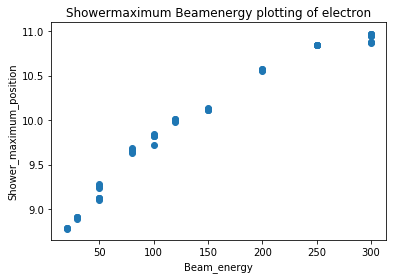

In [6]:
plt.scatter(energy, X0_meanvalue)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

 
1.95 x + 6.015


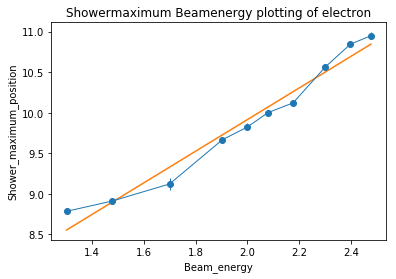

In [7]:
X0_meanvalue = df.groupby("energy").X0_meanvalue.median()
X0_meanvalue = X0_meanvalue.reset_index()
X0_variance = df.groupby("energy").X0_meanvalue.std()
X0_variance = X0_variance.reset_index()
beamenergy = df.groupby("energy").median()
beamenergy = beamenergy.reset_index()
Beamenergy = []
for energies in beamenergy.energy:
    energies = math.log(energies,10)
    Beamenergy.append(energies)
plt.errorbar(Beamenergy, beamenergy.X0_meanvalue, yerr=X0_variance.X0_meanvalue, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
z1=np.polyfit(Beamenergy, beamenergy.X0_meanvalue,1)
p1=np.poly1d(z1)
print(p1)
yvals=p1(Beamenergy)
plot1=plt.plot(Beamenergy, yvals)
#plt.xlim(0,2.5)
#plt.ylim(0,12)
plt.show()

In [28]:
electron_runlist = hgc.runlist.query('Particle == "electron"')
electron_runlist = electron_runlist
electron_runlist = hgc.runlist.query("Particle == 'electron'").query('Configuration == "24a"') .groupby("Energy").apply(lambda x : x.iloc[[0,1,2]])
energy = electron_runlist.Energy.values
electron_runlist

Run                 Date  Nevents  Particle  Energy  \
Energy                                                             
50     661  1139  2018-10-23 19:48:00    10210  electron      50   
       662  1141  2018-10-23 20:12:00    10449  electron      50   
       663  1144  2018-10-23 20:38:00    10079  electron      50   
150    666  1147  2018-10-23 22:02:00    10210  electron     150   
       667  1149  2018-10-23 22:20:00    10918  electron     150   
       668  1151  2018-10-23 22:43:00    10142  electron     150   
300    669  1153  2018-10-23 23:02:00    10061  electron     300   
       670  1154  2018-10-23 23:40:00    10064  electron     300   
       671  1155  2018-10-24 00:15:00    10093  electron     300   

           Configuration  CaloConfiguration  
Energy                                       
50     661           24a                  3  
       662           24a                  3  
       663           24a                  3  
150    666           24a                  3  
       667           24a                  3  
       668           24a                  3  
300    669           24a                  3  
       670           24a                  3  
       671           24a                  3

In [29]:
run_numbers = electron_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
    x0_max = hdf.query("rechit_layer == 19").rechit_X0.values[0]
    total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
    total_sum = total_sum.reset_index()
    total_sum = total_sum.groupby("rechit_X0").median()
    total_sum = total_sum.reset_index()
    total_sum = total_sum[total_sum.rechit_X0 <= x0_max]
    total_sum["rechit_energy"] = total_sum["rechit_energy"]/total_sum["rechit_energy"].sum()
    rechitX0_sum = total_sum.rechit_X0
    rechit_energy_sum = total_sum.rechit_energy
    rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()
    #rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
print (X0_meanvalue)
print (energy)
df = pd.DataFrame({
    "energy" : energy,
    "X0_meanvalue" : X0_meanvalue,
    })
#df.to_csv("Showermaximum_Beamenergy_plotting_electrons_22b.csv")
    #X0_variance.append(rechitX0_variance)
X0_meanvalue

[10.238927671448211, 10.236004145033775, 10.248954572178656, 9.01005497810111, 9.00060309940341, 9.000382270151052, 9.09349912969493, 9.089224724718704, 9.091273905740135]
[ 50  50  50 150 150 150 300 300 300]


[10.238927671448211,
 10.236004145033775,
 10.248954572178656,
 9.01005497810111,
 9.00060309940341,
 9.000382270151052,
 9.09349912969493,
 9.089224724718704,
 9.091273905740135]

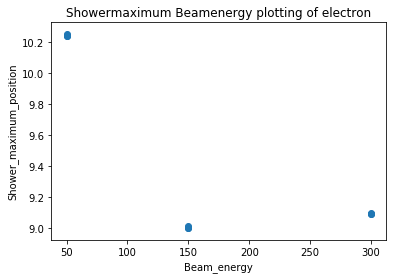

In [30]:
plt.scatter(energy, X0_meanvalue)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

 
-0.6848 x + 12.78


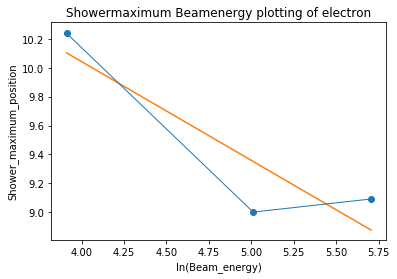

In [31]:
X0_meanvalue = df.groupby("energy").X0_meanvalue.median()
X0_meanvalue = X0_meanvalue.reset_index()
X0_variance = df.groupby("energy").X0_meanvalue.std()
X0_variance = X0_variance.reset_index()
beamenergy = df.groupby("energy").median()
beamenergy = beamenergy.reset_index()
Beamenergy = []
for energies in beamenergy.energy:
    energies = math.log(energies)
    Beamenergy.append(energies)
plt.errorbar(Beamenergy, beamenergy.X0_meanvalue, yerr=X0_variance.X0_meanvalue, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("ln(Beam_energy)")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
z1=np.polyfit(Beamenergy, beamenergy.X0_meanvalue,1)
p1=np.poly1d(z1)
print(p1)
yvals=p1(Beamenergy)
plot1=plt.plot(Beamenergy, yvals)
#plt.xlim(0,2.5)
#plt.ylim(0,12)
plt.show()

In [ ]:
1.336 x + 8.421

In [ ]:
1.17 x + 8.865

In [ ]:
1.348 x + 8.443

In [ ]:
1.102 x + 27.38